In [2]:
# !pip install wordcloud

In [7]:
# !pip install xlrd

## 프로젝트에 필요한 파이썬 패키지 임포트

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import nltk
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import STOPWORDS, WordCloud

In [4]:
all_files = glob.glob('../data/ML_data/myCabinetExcelData*.xls')
all_files

['../data/ML_data\\myCabinetExcelData (1).xls',
 '../data/ML_data\\myCabinetExcelData (2).xls',
 '../data/ML_data\\myCabinetExcelData (3).xls',
 '../data/ML_data\\myCabinetExcelData (4).xls',
 '../data/ML_data\\myCabinetExcelData (5).xls',
 '../data/ML_data\\myCabinetExcelData (6).xls',
 '../data/ML_data\\myCabinetExcelData (7).xls',
 '../data/ML_data\\myCabinetExcelData (8).xls',
 '../data/ML_data\\myCabinetExcelData (9).xls',
 '../data/ML_data\\myCabinetExcelData.xls']

In [8]:
# 저장할 리스트
all_files_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


## 데이터 조합
* 파일 병합하기

In [9]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [10]:
all_files_data_concat.to_csv('../data/ML_data/riss_bigdata.csv', encoding='utf-8', index=False)

## 데이터 전처리
* 수집한 데이터에서 제목을 추출해서 전처리 수행

In [12]:
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjdtn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
# 영어 불용어 확인
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# set 함수 써서 겹치는 것 제거
stopWords = set(stopwords.words('english'))

In [19]:
lemma = WordNetLemmatizer()

In [20]:
# 구두점
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjdtn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tjdtn\AppData\Roaming\nltk_data...


True

In [25]:
words = []

for title in all_title:
    # 정규표현식 사용
    # 영문으로 시작하는 문자를 제외(^)한 문자를 공백(' ') 변경
    enWords = re.sub(r'[^a-zA-Z]+', ' ', str(title))
    # print(enWords)
    # 소문자 정규화 후, 단어 토큰화
    enWordsToken = word_tokenize(enWords.lower())
    # print(enWordsToken)
    # 불용어 제거한 단어 (리스트 컴프리헨션 사용)
    enWordsTokenStop = [w for w in enWordsToken if w not in stopWords]
    # print(enWordsTokenStop)
    # 표제어 추출한 단어 (리스트 컴프리헨션 사용)
    enWordsTokenStopLemma = [lemma.lemmatize(w) for w in enWordsTokenStop]
    # print(enWordsTokenStopLemma)
    # 리스트에 담기
    words.append(enWordsTokenStopLemma)

In [26]:
words

[['guest',
  'editorial',
  'big',
  'medium',
  'data',
  'understanding',
  'search',
  'mining',
  'part'],
 ['guest',
  'editorial',
  'big',
  'scholar',
  'data',
  'discovery',
  'collaboration'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web'],
 ['parallel',
  'computing',
  'preserving',
  'privacy',
  'using',
  'k',
  'anonymisation',
  'algorithm',
  'big',
  'data'],
 ['nosql', 'database', 'big', 'data'],
 ['computation',
  'migration',
  'new',
  'approach',
  'execute',
  'big',
  'data',
  'bioinformatics',
  'workflow'],
 ['towards',
  'real',
  'time',
  'big',
  'data',
  'analytics',
  'platform',
  'health',
  'application'],
 ['new',
  'approach',
  'accurate',
  'distributed',
  'cluster',
  'analysis',
  'big',
  'data',
  'competitive',
  'k',
  'mean'],
 ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'],
 ['towards',
  'max',
  'min',
  'fair',
  'resource',
  'allocation',
  'stream',
  'big',
  'data',
  'analytics',
  's

* 전처리가 끝난 words는 2차원 리스트이기 때문에 reduce() 함수를 사용해 1차원 리스트로 변환한다.

In [28]:
words2 = list(reduce(lambda x, y : x+y, words))
print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

# 데이터 탐색 및 분석 모델 구출

## 데이터 탐색 - 단어 빈도 구하기

In [30]:
count = Counter(words2)
count

Counter({'data': 1645,
         'big': 1354,
         'analytics': 137,
         'analysis': 67,
         'based': 62,
         'using': 57,
         'system': 50,
         'science': 50,
         'management': 48,
         'challenge': 47,
         'approach': 44,
         'mining': 40,
         'new': 38,
         'research': 38,
         'health': 37,
         'model': 37,
         'cloud': 34,
         'smart': 34,
         'learning': 33,
         'opportunity': 31,
         'processing': 30,
         'technology': 28,
         'small': 27,
         'framework': 26,
         'information': 26,
         'computing': 25,
         'application': 25,
         'driven': 24,
         'social': 24,
         'issue': 24,
         'quality': 23,
         'network': 23,
         'deal': 23,
         'knowledge': 22,
         'efficient': 22,
         'review': 22,
         'use': 22,
         'era': 22,
         'healthcare': 21,
         'storage': 21,
         'service': 21,
         'per

In [32]:
# 빈 딕셔너리 생성
word_count = dict()

for tag, counts in count.most_common(50):
    # tag의 빈도가 하나 이상인 경우
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print(f'{tag} : {counts}')

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


## 데이터 탐색 - 히스토그램 그리기

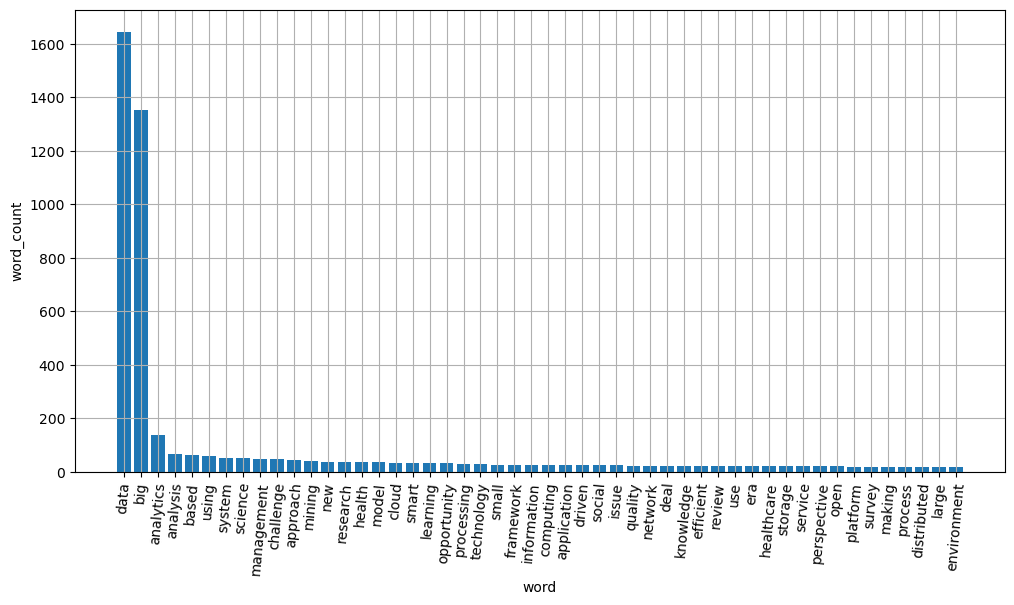

In [37]:
plt.figure(figsize=(12, 6))
plt.xlabel('word')
plt.ylabel('word_count')
plt.grid()

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

# 결과 시각화

In [34]:
# doc_count 컬럼 추가
all_files_data_concat['doc_count'] = 0

# 출판일 컬럼을 기준으로 그룹화
# 그룹별 데이터 개수를 doc_count 컬럼에 저장
# summary_year 리스트 생성
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


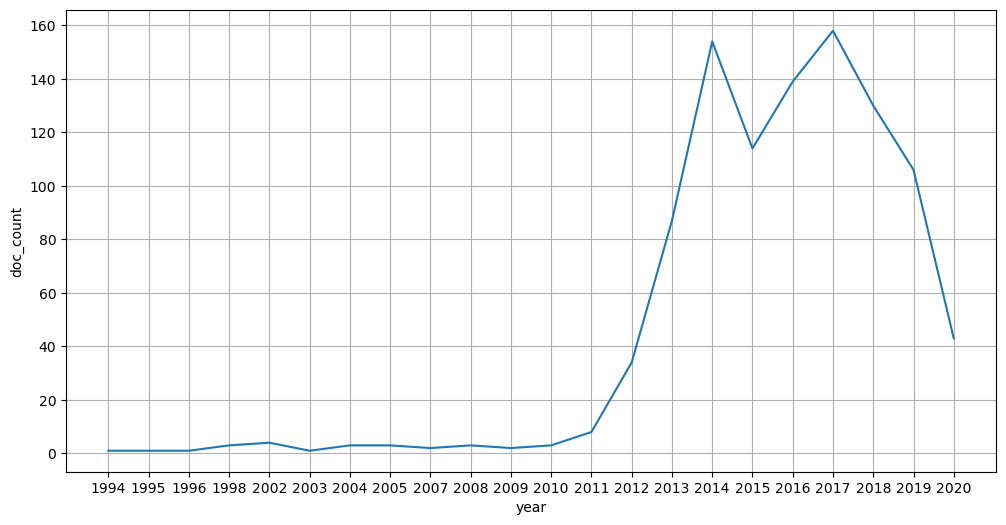

In [36]:
plt.figure(figsize=(12, 6))
plt.xlabel('year')
plt.ylabel('doc_count')
plt.grid()

plt.plot(range(len(summary_year)), summary_year.doc_count)
plt.xticks(range(len(summary_year)), [text for text in summary_year.출판일])
plt.show()

## 워드 클라우드 그리기

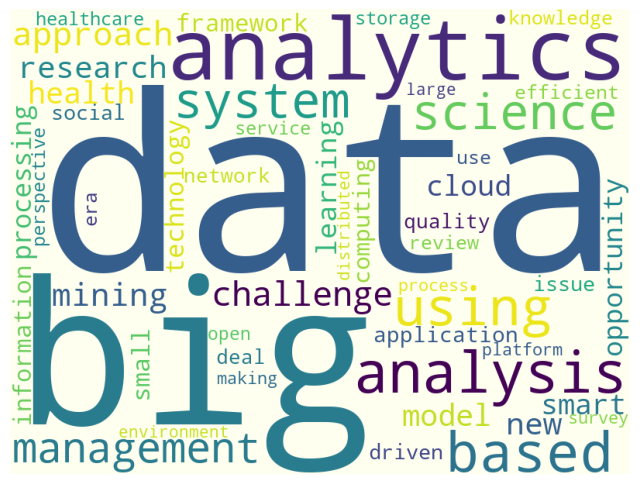

In [41]:
stopwords = set(STOPWORDS)
# print(stopWords)

wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [42]:
cloud.to_file('../data/ML_data/riss_bigdata_wordCloud.jpg')